<img src="../fasp/runner/credits/images/FASPNotebook09.jpg" style="float: right;">

### BioDataCatalyst and CRDC Search-Locate-Compute
This script runs the same work as FASPScript9 and uses FASPRunner twice

In [3]:
from fasp.runner import FASPRunner

# The implementations we're using
from fasp.loc import DRSMetaResolver
from fasp.workflow import GCPLSsamtools, sbcgcWESClient
from fasp.search import BigQuerySearchClient, DiscoverySearchClient

faspRunner = FASPRunner(program='FASPNotebook09.ipynb')
runNote = 'Two dbGaP Sources, CRDC and BioDataCatalyst'

### Step 1 - Discovery
Query for relevant DRS objects

In [4]:
# TCGA Query - CRDC
crdcquery = '''SELECT sp.dbGaP_Subject_ID,
'sbcgc:'||sb_drs_id FROM dbgap_demo.scr_gecco_susceptibility.subject_phenotypes_multi sp
join dbgap_demo.scr_gecco_susceptibility.sample_multi sm on sm.dbgap_subject_id = sp.dbgap_subject_id
join dbgap_demo.scr_gecco_susceptibility.sb_drs_index di on di.sample_id = sm.sample_id 
where AGE between 45 and 55 and sex = 'Female' and file_type = 'cram' limit 3'''


bdcquery = '''
    SELECT sp.dbGaP_Subject_ID,  'bdc:'||read_drs_id
    FROM `isbcgc-216220.COPDGene.Subject_MULTI` sm
    join `isbcgc-216220.COPDGene.Subject_Phenotypes_HMB` sp on sp.dbgap_subject_id = sm.dbgap_subject_id
    join `isbcgc-216220.COPDGene.COPD_DRS` drs on drs.su_submitter_id = sm.subject_id
    where gender = '2'
    and Age_Enroll between 45 and 55
    LIMIT 3'''

searchClient = DiscoverySearchClient('https://ga4gh-search-adapter-presto-public.prod.dnastack.com/')
drsClient = DRSMetaResolver()

# Step 3 - set up a class that runs samtools for us
# providing the location for the resultssettings = faspRunner.settings
settings = faspRunner.settings
wesClient = sbcgcWESClient(settings['SevenBridgesProject'])

faspRunner.configure(searchClient, drsClient, wesClient)
runList = faspRunner.runQuery(crdcquery, runNote)

Running query
SELECT sp.dbGaP_Subject_ID,
'sbcgc:'||sb_drs_id FROM dbgap_demo.scr_gecco_susceptibility.subject_phenotypes_multi sp
join dbgap_demo.scr_gecco_susceptibility.sample_multi sm on sm.dbgap_subject_id = sp.dbgap_subject_id
join dbgap_demo.scr_gecco_susceptibility.sb_drs_index di on di.sample_id = sm.sample_id 
where AGE between 45 and 55 and sex = 'Female' and file_type = 'cram' limit 3
_Retrieving the query_
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
____Page6_______________
subject=2474312, drsID=sbcgc:5baa8cece4b0db63859e6590
sending id 5baa8cece4b0db63859e6590 to: sbcgcDRSClient
workflow submitted, run:f3dd7a8b-ed22-49f7-928e-0aa4dd28474d
____________________________________________________________
subject=2473610, drsID=sbcgc:5baa8d0be4b0db63859e6843
sending id 5baa8d0be4b0db63859e6843 to: sbcgcDRSClient
workflow submitted, run:9b2397db-4217-4245-846f-3f0475525b8b
__________________________

### BioDataCatalyst runs	

In [5]:
searchClient = BigQuerySearchClient()
gcplocation = 'projects/{}/locations/{}'.format(settings['GCPProject'], settings['GCPPipelineRegion'])
wesClient = GCPLSsamtools(gcplocation, settings['GCPOutputBucket'])


faspRunner.configure(searchClient, drsClient, wesClient)
runList = faspRunner.runQuery(bdcquery, runNote)

Running query

    SELECT sp.dbGaP_Subject_ID,  'bdc:'||read_drs_id
    FROM `isbcgc-216220.COPDGene.Subject_MULTI` sm
    join `isbcgc-216220.COPDGene.Subject_Phenotypes_HMB` sp on sp.dbgap_subject_id = sm.dbgap_subject_id
    join `isbcgc-216220.COPDGene.COPD_DRS` drs on drs.su_submitter_id = sm.subject_id
    where gender = '2'
    and Age_Enroll between 45 and 55
    LIMIT 3
subject=593813, drsID=bdc:dg.4503/27ff623b-c509-4ee7-a1b8-aaaa70664fa6
sending id dg.4503/27ff623b-c509-4ee7-a1b8-aaaa70664fa6 to: bdcDRSClient
workflow submitted, run:5262359157740136020
____________________________________________________________
subject=434247, drsID=bdc:dg.4503/c0ee02ea-a94d-426c-9e44-91288216eae0
sending id dg.4503/c0ee02ea-a94d-426c-9e44-91288216eae0 to: bdcDRSClient
workflow submitted, run:3367181755943130512
____________________________________________________________
subject=594619, drsID=bdc:dg.4503/c385fddb-b18e-40d1-806e-851d48ae96fa
sending id dg.4503/c385fddb-b18e-40d1-806e-851d48

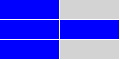

In [6]:
faspRunner.getFASPicon()